In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Red = pd.read_csv("C:/Users/Kamika Hughes/OneDrive/ANA680/winequality-red.csv" , delimiter=';')
White = pd.read_csv("C:/Users/Kamika Hughes/OneDrive/ANA680/winequality-white.csv" , delimiter=';')

In [4]:
Red['red'] = 1

In [5]:
White['red'] = 0

In [6]:
from sklearn.utils import shuffle
df = pd.concat([Red,White], axis=0)
df = shuffle(df, random_state = 1).reset_index().drop(columns = ['index'])


In [7]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.6              0.32         0.58           16.75      0.050   
1               5.7              0.24         0.47            6.30      0.069   
2               7.6              0.36         0.44            8.30      0.255   
3               7.4              0.47         0.46            2.20      0.114   
4               9.9              0.49         0.23            2.40      0.087   
...             ...               ...          ...             ...        ...   
6492            9.2              0.58         0.20            3.00      0.081   
6493            5.6              0.28         0.28            4.20      0.044   
6494            7.0              0.23         0.42            5.10      0.042   
6495            7.2              0.63         0.00            1.90      0.097   
6496            5.7              0.22         0.22           16.65      0.044  

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.6              0.32         0.58           16.75      0.050   
1               5.7              0.24         0.47            6.30      0.069   
2               7.6              0.36         0.44            8.30      0.255   
3               7.4              0.47         0.46            2.20      0.114   
4               9.9              0.49         0.23            2.40      0.087   
...             ...               ...          ...             ...        ...   
6492            9.2              0.58         0.20            3.00      0.081   
6493            5.6              0.28         0.28            4.20      0.044   
6494            7.0              0.23         0.42            5.10      0.042   
6495            7.2              0.63         0.00            1.90      0.097   
6496            5.7              0.22         0.22           16.65      0.044

In [10]:
df['quality'].unique()

array([5, 6, 7, 8, 4, 9, 3], dtype=int64)

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


<AxesSubplot:>

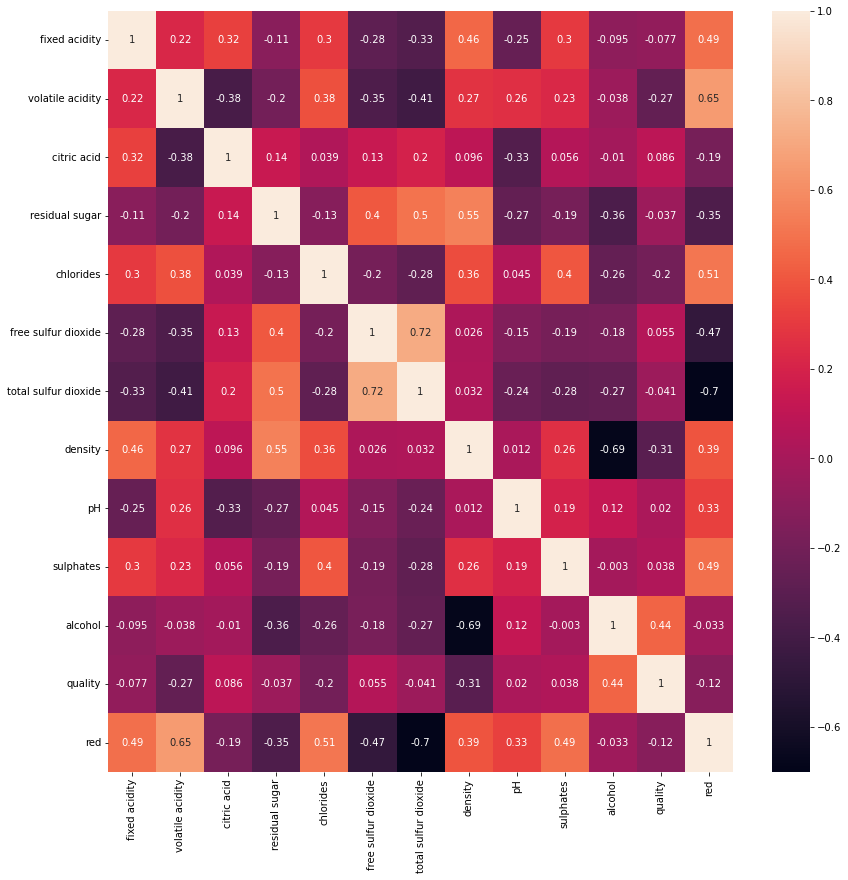

In [12]:
cor = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(cor,annot=True)

In [21]:
cor.sort_values(['quality'],ascending=False,inplace=True)
cor.quality

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
red                    -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

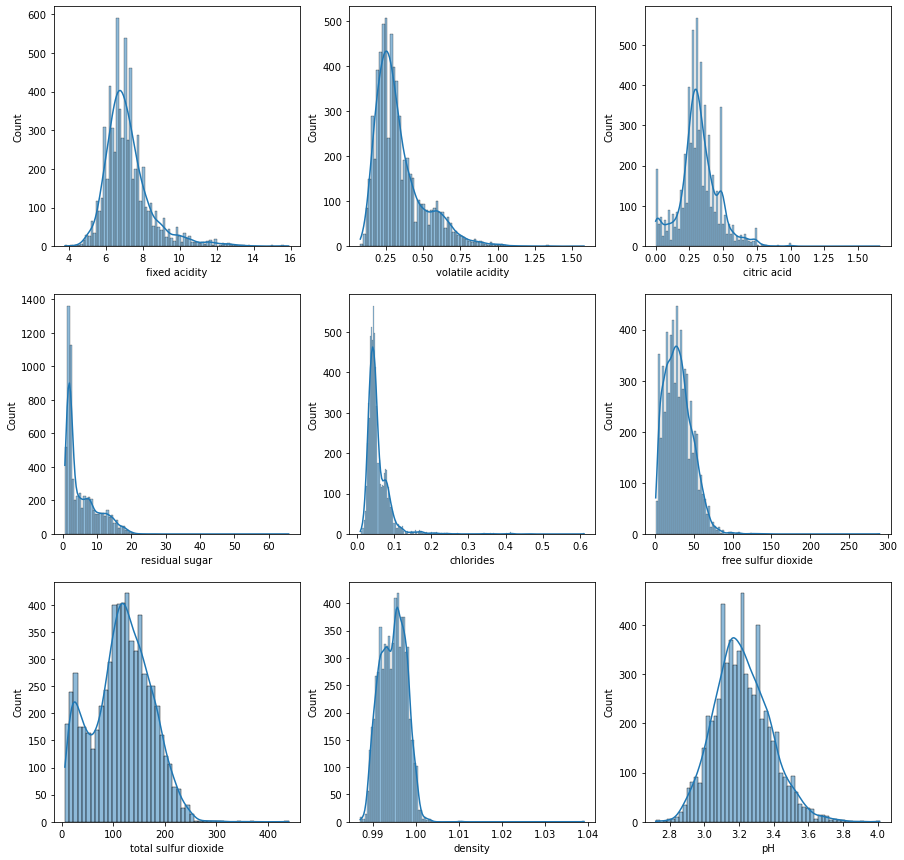

In [22]:
cols = df.drop(columns=['red'])

fig, axes = plt.subplots(3, 3)
fig.set_size_inches(15, 15)  
axes = axes.ravel() 
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, ax = ax)

plt.show()

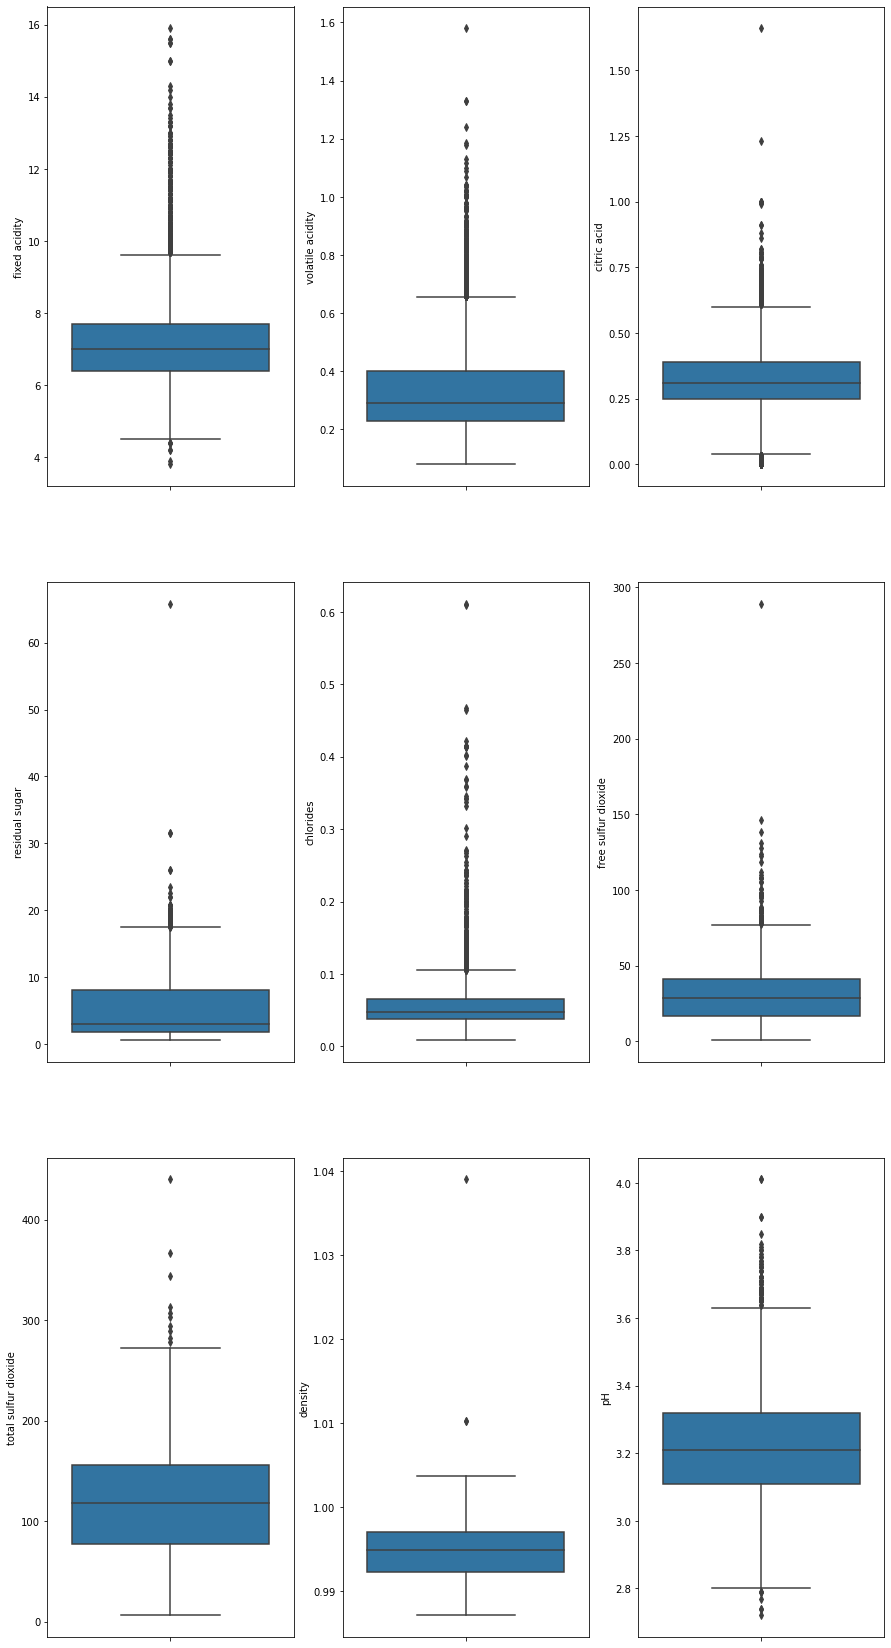

In [23]:
fig, axes = plt.subplots(3, 3)
axes = axes.ravel() 
fig.set_size_inches(15, 30)
for col, ax in zip(cols, axes):
    sns.boxplot(ax =ax,y=df[col])
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
df_two = df.select_dtypes(exclude=['object'])
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [26]:
scaler = StandardScaler()
scaler.fit(df_two)

StandardScaler()

In [27]:
new_scaled_data = scaler.transform(df_two)
new_scaled_data

array([[ 0.29675449, -0.11946024,  1.79872517, ..., -1.08316218,
        -0.93722961, -0.57136659],
       [-1.16891718, -0.6054167 ,  1.04170561, ..., -0.63596747,
        -0.93722961, -0.57136659],
       [ 0.29675449,  0.12351798,  0.83524573, ..., -0.2446721 ,
         0.20799905, -0.57136659],
       ...,
       [-0.16608919, -0.66616126,  0.69760581, ..., -0.2446721 ,
         0.20799905, -0.57136659],
       [-0.01180796,  1.76362102, -2.19283252, ..., -1.2508602 ,
         0.20799905,  1.75018984],
       [-1.16891718, -0.72690581, -0.6787934 , ..., -1.2508602 ,
         0.20799905, -0.57136659]])

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
# use features with best corr alcohol, density, volatile acidity, chlorides
x = df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
y = df['quality']

In [36]:
x.info() #taking a closer look at the features I want to use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alcohol           6497 non-null   float64
 1   density           6497 non-null   float64
 2   volatile acidity  6497 non-null   float64
 3   chlorides         6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [37]:
y.value_counts().sort_values() #verifying the target feature shape to see if it needs to be reshaped

9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: quality, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x, y = oversample.fit_resample(x, y)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [44]:
# Use decision tree to classify 'sex' using 'tota'_bill', 'time_Dinner' and 'day_Sun'
from sklearn.tree import DecisionTreeClassifier
#Criterion parameter can be entropy, gini, logloss, with default = gini.
model = DecisionTreeClassifier(criterion='gini',random_state=1) 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
result= pd.DataFrame({"y_test": y_test.ravel(), "Y-pred": y_pred.ravel()})
result.head(10)

,y_test,Y-pred
0,6,5
1,3,3
2,5,5
3,3,3
4,6,7
5,3,3
6,4,4
7,8,8
8,5,5
9,4,4


In [45]:
# Use mean squared error
mse = mean_squared_error(y_test,y_pred)
print("MSE is ",mse)

MSE is  0.6594801531331855


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[652   9  13  10   4   2   1]
 [ 16 567  43  38  24   8   0]
 [ 15  44 457 141  54   8   0]
 [ 18  34 151 416  91  40   0]
 [  9  19  36 106 507  42   2]
 [  9   4   8  26  33 614   1]
 [  1   0   2   0   0   2 686]]
              precision    recall  f1-score   support

           3       0.91      0.94      0.92       691
           4       0.84      0.81      0.83       696
           5       0.64      0.64      0.64       719
           6       0.56      0.55      0.56       750
           7       0.71      0.70      0.71       721
           8       0.86      0.88      0.87       695
           9       0.99      0.99      0.99       691

    accuracy                           0.79      4963
   macro avg       0.79      0.79      0.79      4963
weighted avg       0.78      0.79      0.78      4963



In [47]:
import pickle
# Open a file and use dump() 
with open('file_kahweek3.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model, file)